# Trees & Searching


In [2]:
from trees import *
from random import randint
from numpy import linspace
import matplotlib.pyplot as plt
%matplotlib inline

comparisons = 0

### Question 1)

In [3]:

def construct( root, children, current_path, use_labels ):
    """
    Construct a sum tree from a given root and children.
    The completed tree is returned.
    
    Arguments
    root: An integer to use as the root.
    children: The list of children to be associated with this root.
    current_path: List of current root and previous roots in tree.
    use_label: Boolean to define whether to use the path labels or not.
    
    Note: Helper function for build_sum_tree.
    """
    
    #Initialise the root of the tree.
    if use_labels:
        T = new_tree( root, [], current_path )
    
    else:
        T = new_tree( root, [] )
    
    #Keep track of child index amognst other children.
    child_position = 0
    
    #Add the child to the tree, with its children as another recusive construct call with its children as
    #numbers to the right of this child in the list (avoid duplication).
    for child in children:
        T = add_child( T, construct( root + child, children[child_position + 1:], current_path + [child], use_labels ) )
        child_position += 1
        
    return T

def build_sum_tree( number_list, use_labels=True ):
    """
    Construct a sum tree using a list of numbers.
    The complete tree is returned.
    
    Arguments
    number_list: List of numbers to construct sum tree with.
    use_labels: Boolean, True signals to contruct the tree path labels.
    
    Note: If analysing tree structure manually, labels reduce human readability.
    """
    
    #Intialise 0 as root node and construct tree.
    return construct( 0, number_list, [0], use_labels )
    

def compare( x, y ):
    """
    Returns True if x and y are not equal, also increments global variable comparisons.
    """
    
    global comparisons
    comparisons += 1
    
    return ( x != y )



def depth_first( tree, item ):
    """
    Perform depth first search on a sum tree for a target.
    Returns solution path, Boolean whether target was found and integer number of comparisons used.
    
    Arguments
    tree: sum tree to search.
    item: target value to search for.
    
    Note: If a solution is not found, the compromise solution value and the path are returned in a list repectively.
    """
    global comparisons
    comparisons = 0
    
    closest = []
    stack = push( tree, [] )
    current_node = top( stack )    #Current_node is the sub-tree with root current_node.
    
    while not empty(stack) and compare(value(current_node), item):
    
        #Keep track of closest solution in case one doesn't exist.
        if not closest:
            closest = [ value( current_node ), label( current_node ) ]
            
        else:
            if abs( item - value(current_node) ) < abs( item - closest[0] ):
                closest = [ value( current_node ), label( current_node ) ]
                
        stack = pop(stack)
        
        #Move children of to top of stack, next up to be searched.
        for child in children( current_node ):
            stack = push( child, stack )
                
        current_node = top( stack )
        
    
    if empty( stack ):
        return closest, False, comparisons
    else:
        return label( current_node ), True, comparisons
    
    
def breadth_first( tree, item ):
    """
    Perform breadth first search on a sum tree for a target.
    Returns solution path, Boolean whether target was found and integer number of comparisons used.
    
    Arguments
    tree: sum tree to search.
    item: target value to search for.
    
    Note: If a solution is not found, the compromise solution value and the path are returned in a list repectively.
    """
    
    global comparisons
    comparisons = 0
    
    closest = []
    queue = enqueue( tree, [] )   #Utilise queues instead of stacks.
    current_node = head( queue )
    
    while not empty( queue ) and compare( value(current_node), item ):
        
        if not closest:
            closest = [ value( current_node ), label( current_node ) ]
            
        else:
            if abs( item - value(current_node) ) < abs( item - closest[0] ):
                closest = [ value( current_node ), label( current_node ) ]
                
        queue = dequeue( queue )
        
        #Move children to end of queue, to be searched last.   
        for child in children( current_node ):
            queue = enqueue( child, queue )
                
        current_node = head( queue )
        
    if empty( queue ):
        return closest, False, comparisons
    else:
        return label( current_node ), True, comparisons
    
    
    
def random_list( length ):
    """
    Returns a random list of numbers between 1 and 100 inclusive.
    
    Arguments
    length: Integer length of list to produce.
    """
    
    random_numbers = []
    
    for i in range( length ):
        
        #Calculate a random number, add to list.
        random_numbers.append( randint(1, 100) )
    
    return random_numbers


### Question 2)

In [4]:
def search_demo( n ):
    """
    Demonstration of depth and breadth searches in a sum tree with a random list of numbers.
    Searches for the target of ( length_list**2 ).
    Returns the tree used without labels.
    
    Arguments
    n: length of numbers list to use in constructing the sum tree.
    """
    
    numbers = random_list( n )
    tree = build_sum_tree( numbers )
    
    print("Number list is:\n", numbers, "\n"*2)
    
    print("Searching for ", n**2, "using depth first:\n")
    depth_solution, found, comparisons = depth_first(tree, n**2)   #Perform depth search.
    
    if found:
        print( "Solution found, summing number(s):\n", depth_solution[1:] )   #[1:] removes the 0 in the soltution.
    
    else:
        if depth_solution[0] == 0:
            print("Solution not found, closest possible solution achievable is 0, using no numbers.\n")
        else:
            print("Solution not found, closest possible solution achievable is", 
                  depth_solution[0], "summing number(s):\n", depth_solution[1][1:])
    
    print("Element comparisons used: ", comparisons, "\n"*2)
    
    print("Searching for ", n**2, "using breadth first:\n")
    breadth_solution, found, comparisons = breadth_first(tree, n**2)   #Perform breadth search.
    
    if found:
        print( "Solution found, summing number(s):\n", breadth_solution[1:] )
    
    else:
        if breadth_solution[0] == 0:
            print("Solution not found, closest possible solution achievable is 0, using no numbers.\n")
        else:
            print("Solution not found, closest possible solution achievable is", 
                  breadth_solution[0], "summing number(s):\n", breadth_solution[1][1:])
        
    print("Element comparisons used: ", comparisons, "\n"*3 )
                          

In [5]:
number_list_lengths = [5, 7, 9]

#Perform search demonstration with lengths 3, 5 and 7.
for list_length in number_list_lengths:
    print("Using number list length of", list_length, "\n"*3)
    search_demo( list_length )

#Show a readable example of a sum tree for inspection.
print("Example of a sum tree (without labels), using the example number list from lectures:\n")
numbers = [11, 14, 19, 23, 47]
build_sum_tree( numbers, False)
    

Using number list length of 5 



Number list is:
 [68, 69, 7, 44, 11] 


Searching for  25 using depth first:

Solution not found, closest possible solution achievable is 18 summing number(s):
 [7, 11]
Element comparisons used:  32 


Searching for  25 using breadth first:

Solution not found, closest possible solution achievable is 18 summing number(s):
 [7, 11]
Element comparisons used:  32 



Using number list length of 7 



Number list is:
 [97, 35, 45, 18, 6, 72, 76] 


Searching for  49 using depth first:

Solution not found, closest possible solution achievable is 51 summing number(s):
 [45, 6]
Element comparisons used:  128 


Searching for  49 using breadth first:

Solution not found, closest possible solution achievable is 51 summing number(s):
 [45, 6]
Element comparisons used:  128 



Using number list length of 9 



Number list is:
 [17, 12, 82, 96, 1, 22, 29, 62, 33] 


Searching for  81 using depth first:

Solution found, summing number(s):
 [17, 12, 1, 22, 29]
Elem

(0,
 [(11,
   [(25,
     [(44, [(67, [(114, [], None)], None), (91, [], None)], None),
      (48, [(95, [], None)], None),
      (72, [], None)],
     None),
    (30, [(53, [(100, [], None)], None), (77, [], None)], None),
    (34, [(81, [], None)], None),
    (58, [], None)],
   None),
  (14,
   [(33, [(56, [(103, [], None)], None), (80, [], None)], None),
    (37, [(84, [], None)], None),
    (61, [], None)],
   None),
  (19, [(42, [(89, [], None)], None), (66, [], None)], None),
  (23, [(70, [], None)], None),
  (47, [], None)],
 None)

### Question 3)

In [6]:
def record_comparisons( list_lengths ):
    """
    Calculate and average the comparisons used to search each random list length in a range.
    Dictionaries for both the depth and breadth results are returned (key = list length, value = average).
    
    arguments
    list_lengths: range of list lengths to search and average comparisons for.
    
    Note: Each list length is searched 5 times with different random lists before averaging.
    """
    
    depth_comparison_results = {}
    breadth_comparison_results = {}
    
    for length in list_lengths:
        
        #Temporary lists to hold the values to be averaged for each length.
        depth_comparisons = []
        breadth_comparisons = []
        
        for repeat in range( 5 ):
            
            tree = build_sum_tree( random_list(length) )
            
            #Add number of comparisons used to the temporary list for each search.
            depth_comparisons.append( depth_first(tree, length**2 )[2] )
            breadth_comparisons.append( breadth_first(tree, length**2)[2] )
             
        #Calculate the average, and assign it to correct key in the dictionary.
        depth_comparison_results[length] = sum( depth_comparisons ) / len( depth_comparisons )
        breadth_comparison_results[length] = sum( breadth_comparisons ) / len( breadth_comparisons )
        
    return depth_comparison_results, breadth_comparison_results



def plot_comparisons( depth_results, breadth_results, list_lengths ):
    """
    Plot search performances on a graph against the worst case.
    
    Arguments
    depth_results: Dictionary of results for depth search.
    breadth_results: Dictionary of results for breadth search.
    list_lengths: range of list lengths used to generate the results.
    """
    x = []
    y = []
    
    #Plot depth search results
    for length in list_lengths:
        x.append( length )
        y.append( depth_results[length] )
    plt.plot( x, y, "or-" )
    
    x = []
    y = []
    
    #Plot breadth search results.
    for length in list_lengths:
        x.append( length )
        y.append( breadth_results[length] )
    plt.plot( x, y, "oy-" )
    
    #Plot the theoretical worst case (discussed in Q4)
    x = linspace( 1, 10 )
    y = 2**x
    plt.plot(x, y)
       
    plt.legend(['Depth Search', 'Breadth Search', 'Worst Case'], loc = 'upper left')
    plt.xlabel('Length of list')
    plt.ylabel('Number of comparisons')
    plt.show()
    

        Length of list           Average depth comparisons     Average breadth comparisons        Worst case     
------------------------------------------------------------------------------------------------------------------------
              1                             2.0                            2.0                        2          
              2                             3.8                            3.6                        4          
              3                             8.0                            8.0                        8          
              4                             16.0                           16.0                       16         
              5                             32.0                           32.0                       32         
              6                             64.0                           64.0                       64         
              7                            128.0                          128.0  

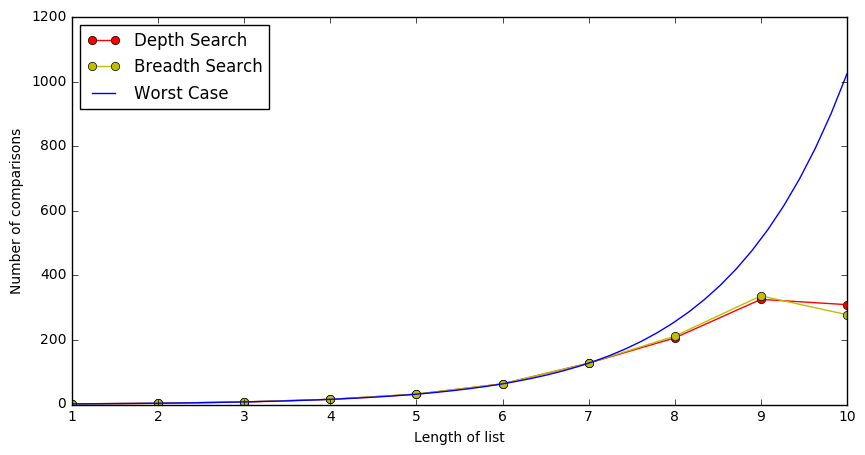

In [7]:
number_list_lengths = range(1, 11)

#Tabulate the data in a presentable table via formatting.
depth_results, breadth_results = record_comparisons( number_list_lengths )
print("{:^30} {:^30} {:^30} {:^20}".format(
        'Length of list','Average depth comparisons', 'Average breadth comparisons', 'Worst case'))
print("-"*120)

for length in number_list_lengths:
    print( "{:^30} {:^30} {:^30} {:^20}".format(length, depth_results[length], breadth_results[length], 2**length))
    
plt.figure(figsize=(10,5))
plot_comparisons( depth_results, breadth_results, number_list_lengths )



### Question 4)

#### How I calculated the theoretical worst case:
The depth and breadth first worst case complexities both occur when a target is not found to be in the tree. This would mean having to search through all possible subsets in the set of numbers. (inclusive of 0).

The number of subsets in a number list of length $n$ would be $2^{n}$. Therefore this would be the worst case complexity, and so I have used this in the above functions. Equally, one could say that there would be $2^n$ nodes in the tree, hence comparison of nodes would be called $2^{n}$ times in the searches.

#### Comments on results:
From running multiple times and analysing the graphs I can deduce that both searches commonly took the worst case complexity comparisons for list lengths 1-5. I have put this down to a low probability of the searched number being calculated from the random list of numbers as there are less of them, hence all nodes had to be compared to find the next best case.

I found that deviations from the worst case started to appear at around length 6 onwards where both searches had fewer comparisons than the worst case, this indicated solutions were being found and so breaking the comparison while loop. As the length of the list increased up to 10, generally speaking, the difference between the worst case and both searches increased further as would be expected with more solutions being found due to more numbers being avaliable for calulating the target.

Comparing the two searches themselves, I noticed that in general the breadth first search took fewer comparisons than the depth first at an overall perspective especially in longer lists. This is understandable as the numbers we are searching for are always relatively small and so more liekly to be higher up in the tree and so detected by breadth first quicker, at longer lists deapth first also would take longer to search each individual branch. However depth first was occassionally more efficient if the solution was in one of the earlier branches of the tree to be searched.

From this investigation I have learnt how to implement the search algorithms discussed in lectures, as well as understand how to calculate the worst case complexity for such searches, and when this would occur. I have also been able to analyse these algorithm's performance using different lengths of number lists and reason through why this may be. In future, I believe it would be more accurate to perform more than 5 repeats before finding the average comparisons used. In it's current state the graph is still quite volatile and upon re-running the program due to the small amount of averages used produces quite a different graph, and so I found myself having to re-run a few times when analysing the graphs. I would also consider searching for fairer targets which are not so small, as to make the experiment less biased towards the breadth first search.


### Question 5)

In [8]:
def construct_countdown( root, children, current_path ):
    """
    Construct a countdown tree from a given root and children.
    The completed tree is returned.
    
    Arguments
    root: An integer to use as the root.
    children: The list of children to be associated with this root.
    current_path: List of current root and previous roots in tree.
    
    Note: Helper function for build_countdown_tree.
    """
    
    #Initialise the root of the tree.
    T = new_tree( root, [], current_path )
    
    child_position = 0
    
    #Add the child to the tree, with its children as another recusive construct using all unused numbers for its children.
    #Repeated for every operator.
    for child in children:
        T = add_child( T, construct_countdown( root + child, children[:child_position] + children[child_position + 1:] , current_path + ["+", child] ) )
        
        #Ensure node is not negative.
        if( root - child ) > 0:
            T = add_child( T, construct_countdown( root - child, children[:child_position] + children[child_position + 1:], current_path + ["-", child] ) )
        
        T = add_child( T, construct_countdown( root * child, children[:child_position] + children[child_position + 1:], current_path + ["*", child] ) )
         
        #Ensure division will result in an integer.
        if( root % child ) == 0:
            T = add_child( T, construct_countdown( root / child, children[:child_position] + children[child_position + 1:], current_path + ["/", child] ) )

        child_position += 1
        
    return T
      
    
def build_countdown_tree( number_list ):
    """
    Construct a countdown tree using a list of numbers.
    The complete tree is returned.
    
    Arguments
    number_list: List of numbers to construct countdown tree with.
    """
    
    #Intialise 0 as root node and construct tree.
    return construct_countdown( 0, number_list, [0] )


def display_countdown_results( numbers, solution, target ):
    """
    Print out solutions found to a countdown problem.
    
    Arguments
    numbers: Avaliable numbers in the problem
    solution: Solution returned by depth or breadth search
    target: Target searched for.
    """

    print("Avaliable numbers are:\n", numbers, "\n"*2)
    
    print("Searching for ", target, "\n")
    
    #If solution found.
    if solution[1]:
        print( "Solution found, with the calculation:\n", solution[0], "\n" )
    
    else:
        print("Solution not found, closest possible solution achievable is", 
              solution[0][0], "using calculation:\n", solution[0][1])
    
    print("Element comparisons used: ", comparisons, "\n"*2)
                          
        


In [14]:
#Use depth first for the first problem.
#display_countdown_results([9, 6, 23, 54, 72, 63], depth_first( build_countdown_tree([9, 6, 23, 54, 72, 63]), 21 ), 21)
build_countdown_tree([9, 6, 23])
#Use breadth first for the second problem.
#display_countdown_results([62, 12, 7, 1, 5, 10],  breadth_first( build_countdown_tree([62, 12, 7, 1, 5, 10]), 130 ), 130)


(0,
 [(9,
   [(15,
     [(38, [], [0, '+', 9, '+', 6, '+', 23]),
      (345, [], [0, '+', 9, '+', 6, '*', 23])],
     [0, '+', 9, '+', 6]),
    (3,
     [(26, [], [0, '+', 9, '-', 6, '+', 23]),
      (69, [], [0, '+', 9, '-', 6, '*', 23])],
     [0, '+', 9, '-', 6]),
    (54,
     [(77, [], [0, '+', 9, '*', 6, '+', 23]),
      (31, [], [0, '+', 9, '*', 6, '-', 23]),
      (1242, [], [0, '+', 9, '*', 6, '*', 23])],
     [0, '+', 9, '*', 6]),
    (32,
     [(38, [], [0, '+', 9, '+', 23, '+', 6]),
      (26, [], [0, '+', 9, '+', 23, '-', 6]),
      (192, [], [0, '+', 9, '+', 23, '*', 6])],
     [0, '+', 9, '+', 23]),
    (207,
     [(213, [], [0, '+', 9, '*', 23, '+', 6]),
      (201, [], [0, '+', 9, '*', 23, '-', 6]),
      (1242, [], [0, '+', 9, '*', 23, '*', 6])],
     [0, '+', 9, '*', 23])],
   [0, '+', 9]),
  (0,
   [(6,
     [(29, [], [0, '*', 9, '+', 6, '+', 23]),
      (138, [], [0, '*', 9, '+', 6, '*', 23])],
     [0, '*', 9, '+', 6]),
    (0,
     [(23, [], [0, '*', 9, '*', 6, '